In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [6]:
df = pd.read_csv("survey data set\\survey.csv")
df.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


In [12]:
df.shape, df.info(), df.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  1259 non-null   object
 1   Age                        1259 non-null   int64 
 2   Gender                     1259 non-null   object
 3   Country                    1259 non-null   object
 4   state                      744 non-null    object
 5   self_employed              1241 non-null   object
 6   family_history             1259 non-null   object
 7   treatment                  1259 non-null   object
 8   work_interfere             995 non-null    object
 9   no_employees               1259 non-null   object
 10  remote_work                1259 non-null   object
 11  tech_company               1259 non-null   object
 12  benefits                   1259 non-null   object
 13  care_options               1259 non-null   object
 14  wellness

((1259, 27),
 None,
 Index(['Timestamp', 'Age', 'Gender', 'Country', 'state', 'self_employed',
        'family_history', 'treatment', 'work_interfere', 'no_employees',
        'remote_work', 'tech_company', 'benefits', 'care_options',
        'wellness_program', 'seek_help', 'anonymity', 'leave',
        'mental_health_consequence', 'phys_health_consequence', 'coworkers',
        'supervisor', 'mental_health_interview', 'phys_health_interview',
        'mental_vs_physical', 'obs_consequence', 'comments'],
       dtype='object'))

In [24]:
df.columns = df.columns.str.lower().str.strip()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   timestamp                  1259 non-null   object
 1   age                        1259 non-null   int64 
 2   gender                     1259 non-null   object
 3   country                    1259 non-null   object
 4   state                      744 non-null    object
 5   self_employed              1241 non-null   object
 6   family_history             1259 non-null   object
 7   treatment                  1259 non-null   object
 8   work_interfere             995 non-null    object
 9   no_employees               1259 non-null   object
 10  remote_work                1259 non-null   object
 11  tech_company               1259 non-null   object
 12  benefits                   1259 non-null   object
 13  care_options               1259 non-null   object
 14  wellness

In [30]:
df.fillna("Not mentioned", inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   timestamp                  1259 non-null   object
 1   age                        1259 non-null   int64 
 2   gender                     1259 non-null   object
 3   country                    1259 non-null   object
 4   state                      1259 non-null   object
 5   self_employed              1259 non-null   object
 6   family_history             1259 non-null   object
 7   treatment                  1259 non-null   object
 8   work_interfere             1259 non-null   object
 9   no_employees               1259 non-null   object
 10  remote_work                1259 non-null   object
 11  tech_company               1259 non-null   object
 12  benefits                   1259 non-null   object
 13  care_options               1259 non-null   object
 14  wellness

In [33]:
df["timestamp"] = pd.to_datetime(df["timestamp"], format="%Y-%m-%d %H:%M:%S")
df["timestamp"]

0      2014-08-27 11:29:31
1      2014-08-27 11:29:37
2      2014-08-27 11:29:44
3      2014-08-27 11:29:46
4      2014-08-27 11:30:22
               ...        
1254   2015-09-12 11:17:21
1255   2015-09-26 01:07:35
1256   2015-11-07 12:36:58
1257   2015-11-30 21:25:06
1258   2016-02-01 23:04:31
Name: timestamp, Length: 1259, dtype: datetime64[ns]

In [52]:
cols=['timestamp', 'age', 'gender', 'country', 'state', 'self_employed',
       'family_history', 'treatment', 'work_interfere', 'no_employees',
       'remote_work', 'tech_company', 'benefits', 'care_options',
       'wellness_program', 'seek_help', 'anonymity', 'leave',
       'mental_health_consequence', 'phys_health_consequence', 'coworkers',
       'supervisor', 'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence', 'comments']

for i in cols:
    print(f'\033[1m\033[31m{i.upper()}\033[0m\033[0m'.center(50))
    print(df[i].unique,end=" ")
    print()
    print()

            TIMESTAMP            
<bound method Series.unique of 0      2014-08-27 11:29:31
1      2014-08-27 11:29:37
2      2014-08-27 11:29:44
3      2014-08-27 11:29:46
4      2014-08-27 11:30:22
               ...        
1254   2015-09-12 11:17:21
1255   2015-09-26 01:07:35
1256   2015-11-07 12:36:58
1257   2015-11-30 21:25:06
1258   2016-02-01 23:04:31
Name: timestamp, Length: 1259, dtype: datetime64[ns]> 

               AGE               
<bound method Series.unique of 0       37
1       44
2       32
3       31
4       31
        ..
1254    26
1255    32
1256    34
1257    46
1258    25
Name: age, Length: 1259, dtype: int64> 

             GENDER              
<bound method Series.unique of 0       Female
1            M
2         Male
3         Male
4         Male
         ...  
1254      male
1255      Male
1256      male
1257         f
1258      Male
Name: gender, Length: 1259, dtype: object> 

             COUNTRY             
<bound method Series.unique of 0        United

In [53]:
non_bin_gen = ['genderqueer','non-binary','enby', 'androgyne','agender','fluid','queer/she/they', 'neuter']

def gender_cleaning(gen):
    gen = gen.lower().strip()
    if ('fe' in gen or gen == 'f') and 'trans' not in gen:
        return 'female'
    elif 'trans' in gen and ('female' in gen or 'woman' in gen):
        return 'trans woman'
    elif gen == 'm' or 'male' in gen or 'man' in gen or 'mal' in gen or gen == 'malr' or gen == 'msle' or gen =='make' or 'guy' in gen:
        return 'male'
    elif gen in non_bin_gen:
        return 'non binary'
    else:
        return 'not mentioned'

In [54]:
df["gender"] = df["gender"].apply(lambda x:gender_cleaning(x))

In [65]:
def agecat(x):
    if x<20:
        return 'teen'
    elif x>20 and x<=30:
        return 'adult'
    elif x>30 and x<=50:
        return 'middle age'
    else:
        return 'senior'

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   timestamp                  1259 non-null   datetime64[ns]
 1   age                        1225 non-null   object        
 2   gender                     1259 non-null   object        
 3   country                    1259 non-null   object        
 4   state                      1259 non-null   object        
 5   self_employed              1259 non-null   object        
 6   family_history             1259 non-null   object        
 7   treatment                  1259 non-null   object        
 8   work_interfere             1259 non-null   object        
 9   no_employees               1259 non-null   object        
 10  remote_work                1259 non-null   object        
 11  tech_company               1259 non-null   object        
 12  benefi

In [66]:
df["age_cat"] = df["age"].apply(lambda x: agecat(x))


TypeError: '<' not supported between instances of 'str' and 'int'

In [60]:
def pie_plt(x, lab, tit):
    plt.figure(figsize=(8, 4))
    plt.pie(x, labels= lab, autopct = '%1.1f%%', textprops={'fontsize': 8})
    plt.title(tit.upper())
    plt.show()

In [ ]:
def val_cnts(df, col):
    return df[col].value_counts().reset_index()

ValueError: could not convert string to float: 'female'

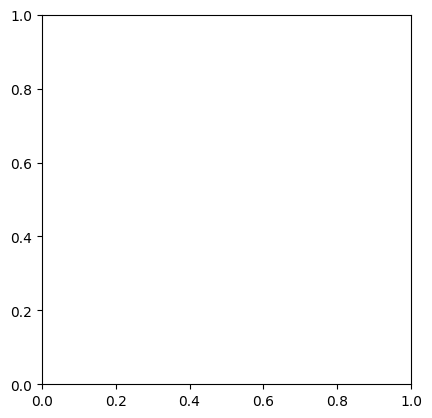

In [58]:
plt.pie(x=df["gender"])